In [37]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [38]:
spad_14 = pd.read_csv("../data/Chlorophyll/2017-04-14.csv", header=None)
spad_28 = pd.read_csv("../data/Chlorophyll/2017-04-28_rm_missing.csv", header=None)
wp_df = pd.read_csv("../data/WaterPotential/Lettuce.csv")

### Find SPAD & WP correlation with repeating WP values
#### Remove 32 because it was missed during spectra collection

In [39]:
wp_14 = np.repeat(wp_df["04/14/17"].as_matrix(), 3)
wp_28 = np.repeat(wp_df["04/28/17"].as_matrix(), 3)
wp_28 = np.delete(wp_28, 32)
print(wp_14.shape, wp_28.shape)

(36,) (35,)


In [40]:
print(spad_14.shape, spad_28.shape)

(36, 1) (35, 1)


In [41]:
spad = np.concatenate((spad_14, spad_28), axis=0).squeeze()
wp = np.concatenate((wp_14, wp_28), axis=0)

In [42]:
print(spad.shape, wp.shape)

(71,) (71,)


In [43]:
stats.pearsonr(spad, wp)

(-0.030483248122802738, 0.80076602903773764)

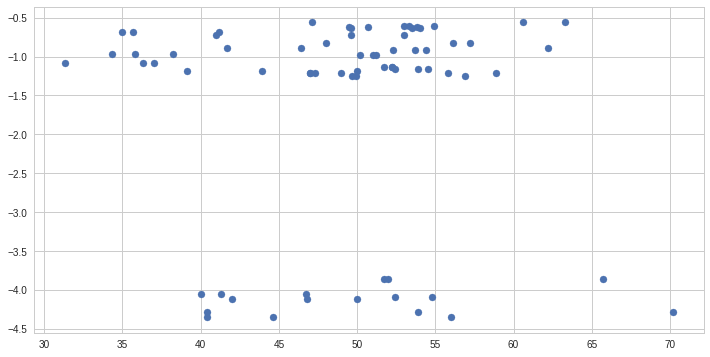

In [44]:
plt.scatter(spad, wp)

### Find NDVI & WP correlation with non-repeating WP values

In [45]:
spad_14_sub = spad_14.as_matrix()[::3].squeeze()
spad_28_sub = np.insert(spad_28.as_matrix(), 32, 0)[::3].squeeze()

In [46]:
spad = np.concatenate((spad_14_sub, spad_28_sub), axis=0)
wp = np.concatenate((wp_df["04/14/17"], wp_df["04/28/17"]), axis=0)
print(spad.shape, wp.shape)

(24,) (24,)


In [47]:
stats.pearsonr(spad, wp)

(-0.24139075355044726, 0.25581302073106632)

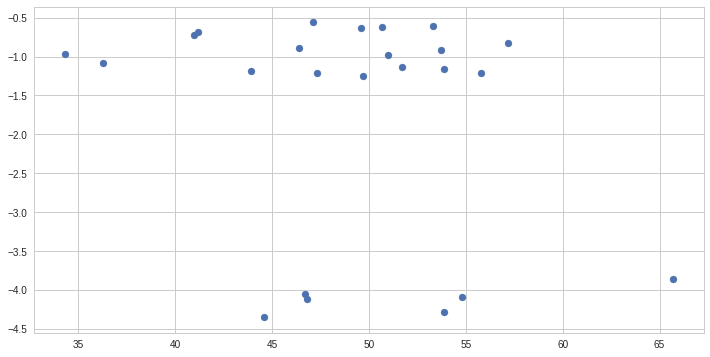

In [48]:
plt.scatter(ndvi, wp)